In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_table('Data/DeepFashion/list_attr_img.txt',skiprows=1,sep='\s+',header=None)
bbox = pd.read_table('Data/DeepFashion/list_bbox.txt',sep='\s+')
joined = bbox.join(df,lsuffix='image_name',rsuffix='0')

In [3]:
attr = (df.iloc[:,6:].values>0)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([ 940.,   40.,    5.,    4.,    3.,    1.,    1.,    0.,    0.,    1.]),
 array([    51. ,   3782.6,   7514.2,  11245.8,  14977.4,  18709. ,
         22440.6,  26172.2,  29903.8,  33635.4,  37367. ]),
 <a list of 10 Patch objects>)

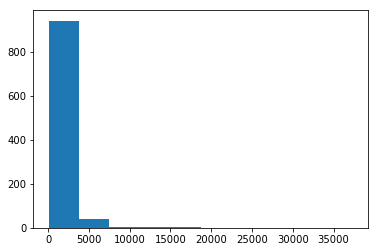

In [5]:
plt.hist(np.sum(attr,axis=0))

In [31]:
a_counts = (np.sum(attr,axis=0))

In [37]:
np.sum(a_counts>1000)

206

In [42]:
top_a = np.flip(a_counts.argsort(),0)[:206]

In [7]:
top_classes = np.where(np.sum(attr,axis=0) > 1000)[0]

In [43]:
attr_subset = attr[:,top_a]

(array([ 160.,   34.,    4.,    2.,    3.,    1.,    1.,    0.,    0.,    1.]),
 array([  1012. ,   4647.5,   8283. ,  11918.5,  15554. ,  19189.5,
         22825. ,  26460.5,  30096. ,  33731.5,  37367. ]),
 <a list of 10 Patch objects>)

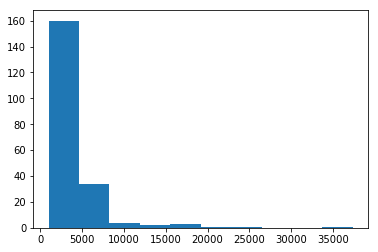

In [45]:
plt.hist(np.sum(attr_subset,axis=0))

In [50]:
subset = pd.DataFrame([], columns=joined.columns)

In [51]:
for a in top_a[::-1]:
    needed = 1000 - np.sum(subset.iloc[:,6+a]>0)
    if needed > 0:
        print(needed)
        has_attr = joined[joined.iloc[:,6+a]>0]
        sample = np.random.randint(has_attr.shape[0],size=needed)
        subset = subset.append(has_attr.iloc[sample])

1000
1000
1000
995
1000
993
989
1000
999
1000
1000
1000
993
982
896
1000
993
1000
997
994
988
999
993
967
984
1000
940
992
999
888
992
1000
1000
979
992
996
998
1000
951
953
968
887
969
958
957
807
1000
993
991
982
972
963
992
953
647
45
984
969
974
946
753
995
986
880
991
1000
955
981
953
891
921
999
823
960
999
989
857
466
663
997
625
968
990
993
931
647
977
982
980
269
953
973
773
957
995
992
974
627
994
767
929
862
617
975
989
986
915
956
991
957
990
968
870
620
739
975
927
849
912
481
967
811
971
501
953
978
976
838
900
841
197
962
990
917
921
991
285
898
817
971
669
275
908
723
417
983
994
915
948
508
986
955
947
880
950
884
932
950
76
980
806
923
929
891
916
694
945
835
535
967
7
969
968
196
976
944
981
7
83
883
983
590
807


In [15]:
subset.shape

(162418, 1006)

In [25]:
attr_subset = (subset.iloc[:,6+top_classes].values>0)

(array([  8.30540000e+04,   7.36020000e+04,   9.64340000e+04,
          1.95630000e+04,   9.45900000e+03,   5.90300000e+03,
          7.62000000e+02,   4.02000000e+02,   2.90000000e+01,
          1.40000000e+01]),
 array([  0. ,   1.4,   2.8,   4.2,   5.6,   7. ,   8.4,   9.8,  11.2,
         12.6,  14. ]),
 <a list of 10 Patch objects>)

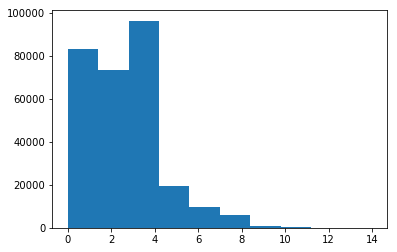

In [53]:
plt.hist(np.sum(attr_subset,axis=1))

In [52]:
np.sum(attr_subset,axis=1)

array([2, 2, 4, ..., 2, 4, 4])